<a href="https://colab.research.google.com/github/bkgsur/FinanceModelingComputation/blob/main/1_CDF_PDF_CHF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits import mplot3d

#https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)

#Variables
i = np.complex(0,1);

In [64]:
#Plot functions

def plot_pdf(t,fn):
  plot_2d(t,fn, 1, "pdf")

def plot_cdf(t,fn):
  plot_2d(t,fn, 2, "cdf")

def plot_2d(t,fn, fig_index, y_label):
  plt.figure(fig_index);
  plt.plot(t,fn(t))
  plt.grid()
  plt.xlabel("t")
  plt.ylabel(y_label)

def plot_chf(t, fn, d):
  plt.figure(3)
  fnv = fn(t)
  x = np.real(fnv)
  y = np.imag(fnv)
  plt.title("Chf")
  if(d=='2d'):
    plot_chf_2d(t,x)
  elif(d=='3d'):
    plot_chf_3d(t,x,y)    

def plot_chf_3d(t,x,y): 
  ax = plt.axes(projection="3d") 
  ax.plot3D(t,x,y,"blue")
  ax.view_init(30,-120)

def plot_chf_2d(t,x):
  plt.plot(t,x)
  plt.grid()
  plt.xlabel("t")
  plt.ylabel("x")
 

In [ ]:
#Normal Distribution

def normal_dist(mu, sigma_sq):  
  t = np.linspace(5, 15, 100)
  u = np.linspace(0,5,250);
  plot_pdf(t,lambda t: st.norm.pdf(t,mu,sigma_sq))
  plot_cdf(t,lambda t: st.norm.cdf(t, mu, sigma_sq)) 
  plot_chf(u,lambda u: np.exp(i*mu*u - ((sigma_sq * sigma_sq * u * u)/2.0)),'3d')

normal_dist(10,1)
normal_dist(9,1)

In [ ]:
def uniform_dist(a,b):
  t1 = np.linspace(a, b,40)
  n = b-a+1
  plot_pdf(t1,lambda t1: st.uniform.pdf(t1))
  plot_cdf(t1,lambda t1: st.uniform.cdf(t1)) 
  plot_chf(t1,lambda t1: (np.exp(i*t1*a) - np.exp(i*t1*(b+1)))/(n*(1-np.exp(i*t1))),'2d')
#uniform_dist(-1,1)
uniform_dist(-5,5)

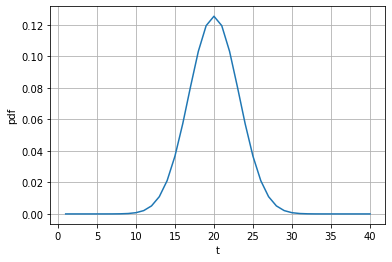

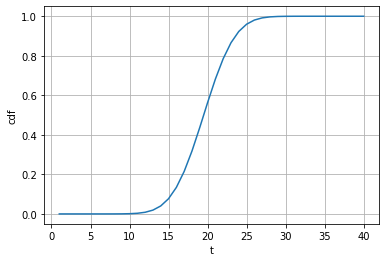

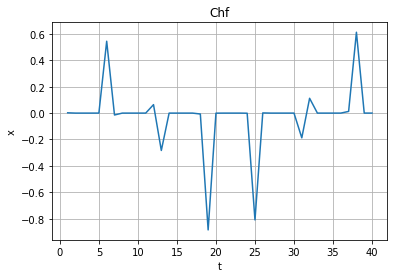

In [73]:
def binomial_dist(n, p):
  t2= np.linspace(1,n,40)
  q = 1-p;
  plot_pdf(t2,lambda t2: st.binom.pmf(t2,n,p))
  plot_cdf(t2,lambda t2: st.binom.cdf(t2,n,p))
  plot_chf(t2,lambda t2: np.power((q + p * np.exp(i * t2)),n),'2d') 
binomial_dist(40, 0.5)